# Gender Classification using Hog features

## Accuracy Results
#### Case1:
- Normalize Image
- convert it to gray scale
- Results:
    - knn: 0.6538461538461539
    - svm: 0.6794871794871795
    - random forest: 0.7435897435897436

#### Case2:
- convert it to gray scale
- Results:
    - knn: 0.6666666666666666
    - svm: 0.7051282051282052
    - random forest: 0.717948717948718

#### Case3:
- Binary thresholding
- textarea extraction
- Normalize Image
- Results:
    - knn: 0.5897435897435898
    - svm: 0.5256410256410257
    - random forest: 0.5128205128205128

#### Case4:
- Binary thresholding
- Normalize Image
- Results:
    - knn: 0.5641025641025641
    - svm: 0.6282051282051282
    - random forest: 0.6666666666666666


In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
%matplotlib inline  
import glob
import utilities as util
from skimage.transform import resize
from skimage.color import rgb2gray
from skimage.feature import hog
from skimage import exposure


ModuleNotFoundError: No module named 'cv2'

Females handwritten samples


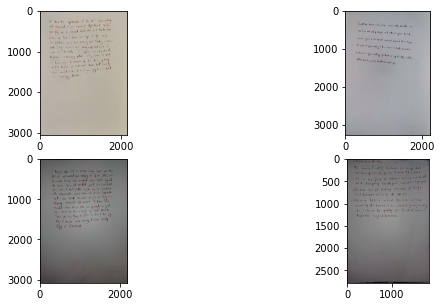

Males handwritten samples


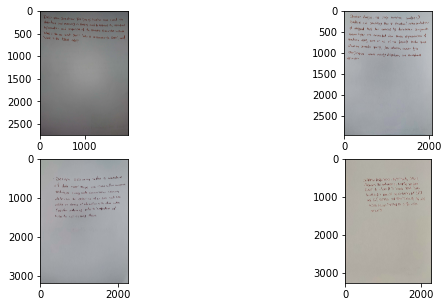

In [46]:
# Read the test images
female_imgs = util.read_imgs('data/Female/Female')
male_imgs = util.read_imgs('data/Male/Male')


# Preview 9 samples
print('Females handwritten samples')
util.draw_grid(figsize=(10,5), rows=2, cols=2, imgs=female_imgs[:4])
print('Males handwritten samples')
util.draw_grid(figsize=(10,5), rows=2, cols=2, imgs=male_imgs[:4])

In [ ]:
# Visualize the hog features on an image
img = rgb2gray(female_imgs[3])
img = resize(img, (128,64),anti_aliasing=True)
hog_features, hog_img= hog(img, orientations=9, pixels_per_cell=(8, 8),
                           cells_per_block=(3, 3), block_norm='L2-Hys',
                           visualize=True, transform_sqrt=False, feature_vector=True, multichannel=None)

util.draw_grid(rows=1,cols=2, imgs=[female_imgs[3], hog_img])
print('hog_features vector length:', hog_features.shape)

### HOG Feature Extraction

In [36]:
# Binary Thresholding and Text Area Extraction on all images
females_count = len(female_imgs) 

males_count = len(male_imgs)

X = []
y = []
# Calculating features for females' images
for i in range(females_count):
#     # Binary Thresholding the image to only 0 and 255
#     img = util.threshold_image(female_imgs[i])
        
    img = rgb2gray(female_imgs[i])
    
    # Resize the image to reduce the hog feature vector size
    img = resize(img, (128,64),anti_aliasing=True)
    # Extract the hog features
    hog_features= hog(img, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(3, 3), block_norm='L2-Hys', visualize=False, transform_sqrt=False, feature_vector=True, multichannel=None)
    X.append(hog_features)
    y.append(1)
    
# Calculating features for males' images
for i in range(males_count):
#     # Binary Thresholding the image to only 0 and 255
#     img = util.threshold_image(male_imgs[i])
    
    img = rgb2gray(male_imgs[i])
    
    # Resize the image to reduce the hog feature vector size
    img = resize(img, (128,64),anti_aliasing=True)
    # Extract the hog features
    hog_features= hog(img, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(3, 3), block_norm='L2-Hys', visualize=False, transform_sqrt=False, feature_vector=True, multichannel=None)
    X.append(hog_features)
    y.append(0)
    

In [12]:
np.shape(X)

(258, 6804)

In [37]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=109) 

clf = svm.SVC(kernel='linear') 
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6794871794871795


In [27]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.717948717948718


In [28]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)

# Train the model using the training sets
model.fit(X_train,y_train)

#Predict Output
y_pred = model.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6666666666666666
